In [13]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from matplotlib.colors import ListedColormap

In [14]:
# Loading the data from the CSV file
data = pd.read_csv("data_hw1.csv")

In [19]:
data

,Test,Propellant age,Storage temperature,Pass/fail for application
0,1,15.50,40.00,fail
1,2,23.75,23.25,fail
2,3,8.00,17.00,pass
3,4,17.00,21.00,fail
4,5,5.50,10.00,pass
5,6,19.00,12.00,pass
6,7,24.00,20.00,fail
7,8,2.50,12.00,pass
8,9,7.50,15.00,pass
9,10,11.00,26.00,fail


In [15]:
# Extracting features and labels
X = data[['Propellant age', 'Storage temperature']].values
y = data['Pass/fail for application'].apply(lambda x: 1 if x == 'pass' else 0).values

In [16]:
X

array([[15.5 , 40.  ],
       [23.75, 23.25],
       [ 8.  , 17.  ],
       [17.  , 21.  ],
       [ 5.5 , 10.  ],
       [19.  , 12.  ],
       [24.  , 20.  ],
       [ 2.5 , 12.  ],
       [ 7.5 , 15.  ],
       [11.  , 26.  ]])

In [17]:
# Function to plot decison boundary
def plot_decision_boundary(model, X, y, n_neighbors):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    h = .02  # Step size in the mesh

    # Creating a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the result to create a grid of predictions
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"kNN Decision Boundary (k={n_neighbors})")
    plt.xlabel('Propellant age (Weeks)')
    plt.ylabel(f'Storage temperature ({chr(176)}C) ')
    plt.show()

In [18]:
# Defining k values for LOOCV
k_values = range(1, len(X))    #(k goes from 1 to no. of samples


In [6]:
# Performing LOOCV to find the optimal k
accuracies = []

for k in k_values:
    total_accuracy = 0
    for i in range(len(X)):
        # Creating training set by leaving out the i-th sample
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i, axis=0)

        # Creating validation set using the i-th sample
        X_val = X[i].reshape(1, -1)
        y_val = y[i]

        # Trainning the kNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Predicting on the validation set
        y_pred = knn.predict(X_val)

        # Calculating accuracy
        if y_pred == y_val:
            total_accuracy += 1

    # Calculating LOOCV accuracy for current k
    LOOCV_accuracy = total_accuracy / len(X)
    accuracies.append(LOOCV_accuracy)

In [7]:
# Finding the optimal k with the highest LOOCV accuracy
optimal_k_value = k_values[np.argmax(accuracies)]

In [8]:
print(f"Optimal k value: {optimal_k_value}")

Optimal k value: 1


In [9]:
# Trainning kNN model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k_value)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

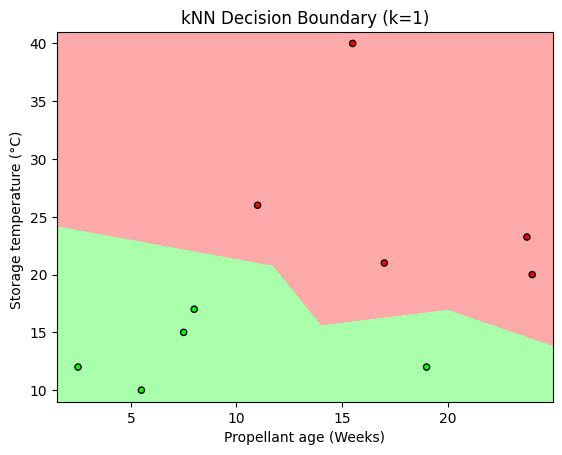

In [10]:
# Plotting the decision boundary with the optimal k
plot_decision_boundary(knn, X, y, n_neighbors=optimal_k_value)

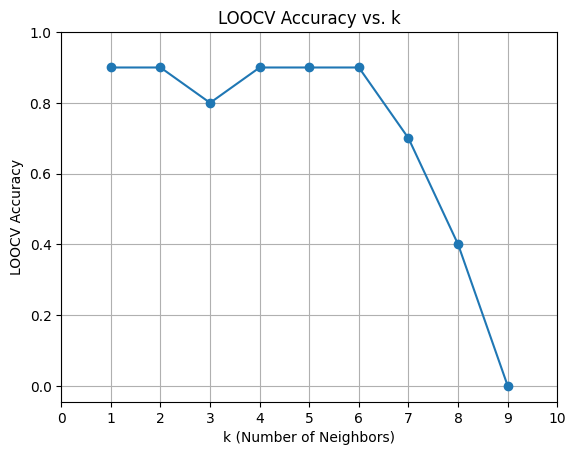

In [22]:
# Plotting the LOOCV results
plt.plot(k_values, accuracies, marker='o')
plt.title('LOOCV Accuracy vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('LOOCV Accuracy')
# Adding grid lines
plt.grid(True)
n = len(k_values)  # Number of data points
# Setting y-axis tick positions and labels from 0 to 1
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.xticks(range(11))
plt.show()